# 決定木モデル（decision tree）

In [1]:
%load_ext Cython

In [4]:
%%cython
import numpy as np
from sklearn.model_selection import train_test_split
csv = './openpowerlifting-2020-09-06.csv'
df = pandas.read_csv(csv,index_col=0,low_memory=False)
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0, 'Mx': -1})
df['Equipment'] = df['Equipment'].map({'Single-ply':0, 'Raw':1, 'Wraps':2, 'Unlimited':3, 'Multi-ply':4})
data = df[['Sex','BodyweightKg', 'Best3SquatKg', 'Best3DeadliftKg', 'Best3BenchKg','Age','Country','Equipment']].dropna(how='any')
X_train, X_test, y_train, y_test  = train_test_split(
    data.drop(['Best3BenchKg', 'Country', 'Equipment'], axis = 1).astype('int'),
    data['Best3BenchKg'].astype('int')
)

In [5]:
X_train.head(3)

,Sex,BodyweightKg,Best3SquatKg,Best3DeadliftKg,Age
Name,,,,,
Ussery Theopolis,1,66,132,195,31
Todd Hayataka,1,67,207,227,22
Emma Foster,0,61,142,157,17


## 回帰木

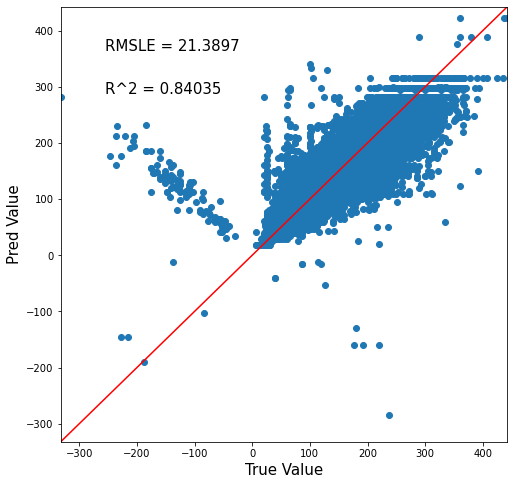

In [9]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

clf = tree.DecisionTreeRegressor(max_depth=10)
model = clf.fit(X_train, y_train)
predicted = model.predict(X_test)

#予測値と正解値を描写する関数
def True_Pred_map(pred_df):
    RMSLE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    R2 = r2_score(pred_df['true'], pred_df['pred']) 
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('true', 'pred', data=pred_df)
    ax.set_xlabel('True Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    plt.text(0.1, 0.9, 'RMSLE = {}'.format(str(round(RMSLE, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R^2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)


pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
pred_df.columns = ['true', 'pred']

True_Pred_map(pred_df)

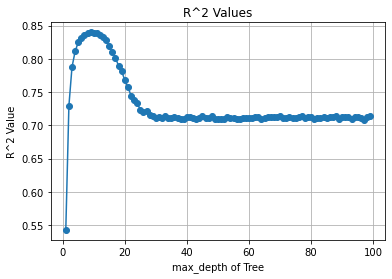

In [10]:
R2_list = []
count = []
for i in range(1, 100):
    clf = tree.DecisionTreeRegressor(max_depth=i)
    model = clf.fit(X_train, y_train)
    predicted = model.predict(X_test)
    pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
    pred_df.columns = ['true', 'pred']
    R2 = r2_score(pred_df['true'], pred_df['pred'])
    R2_list.append(R2)
    count.append(i)
plt.plot(count, R2_list, marker="o")
plt.title("R^2 Values")
plt.xlabel("max_depth of Tree")
plt.ylabel("R^2 Value")
plt.grid(True)

In [11]:
max(R2_list)

0.8397740891592838

In [12]:
R2_list.index(0.8397740891592838)

8

## 決定係数（Ｒ^2）とは

- https://aizine.ai/r2-score0411/#toc2   
- https://rin-effort.com/2019/12/25/machine-learning-4/

In [2]:
%%cython
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping
from keras.layers.normalization import BatchNormalization
csv = './openpowerlifting-2020-09-06.csv'
df = pandas.read_csv(csv,index_col=0,low_memory=False)
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0, 'Mx': -1})
df['Equipment'] = df['Equipment'].map({'Single-ply':0, 'Raw':1, 'Wraps':2, 'Unlimited':3, 'Multi-ply':4})
data = df[['Sex','BodyweightKg', 'Best3SquatKg', 'Best3DeadliftKg','Age','Equipment', 'Best3BenchKg']].dropna(how='any')

In [7]:
X_train, X_test, y_train, y_test  = train_test_split(
    data.drop(['Best3BenchKg'], axis = 1).astype('int'),
    data['Best3BenchKg'].astype('int')
)

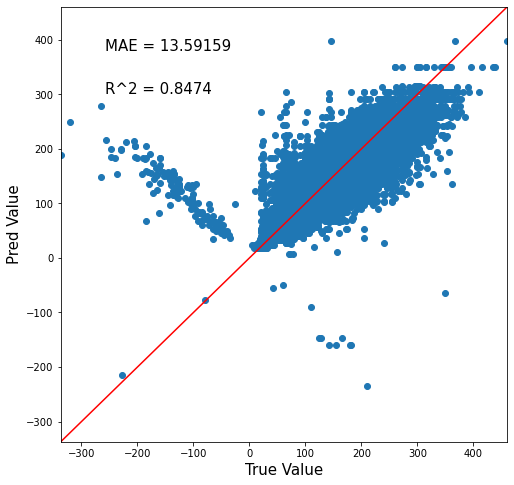

In [9]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

clf = tree.DecisionTreeRegressor(max_depth=10)
model = clf.fit(X_train, y_train)
predicted = model.predict(X_test)

#予測値と正解値を描写する関数
def True_Pred_map(pred_df):
    MAE = mean_absolute_error(pred_df['true'], pred_df['pred'])
    R2 = r2_score(pred_df['true'], pred_df['pred']) 
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('true', 'pred', data=pred_df)
    ax.set_xlabel('True Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    plt.text(0.1, 0.9, 'MAE = {}'.format(str(round(MAE, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R^2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)


pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
pred_df.columns = ['true', 'pred']

True_Pred_map(pred_df)